In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("dataset.csv")

In [8]:
X = df[['reading_speed_wpm', 'error_rate_percent', 'long_pauses']]
y = df['dyslexia_confidence_score']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [11]:
y_pred = reg.predict(X_test)

In [12]:
mae = mean_absolute_error(y_test, y_pred)

In [14]:
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

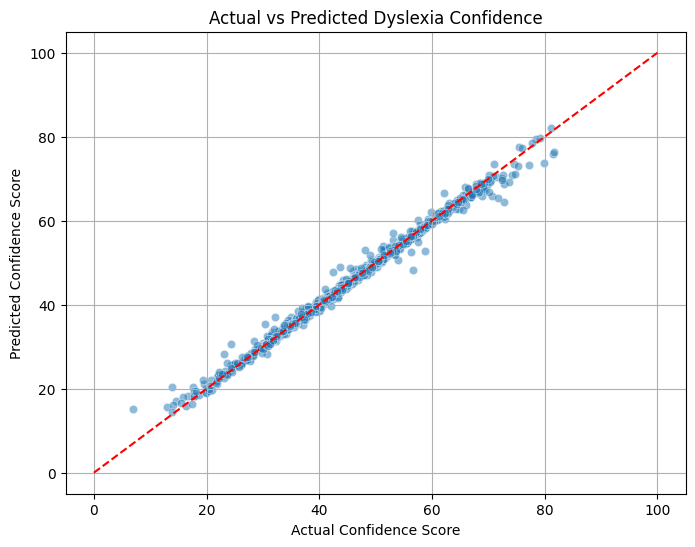

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([0, 100], [0, 100], '--r')
plt.xlabel("Actual Confidence Score")
plt.ylabel("Predicted Confidence Score")
plt.title("Actual vs Predicted Dyslexia Confidence")
plt.grid(True)
plt.show()

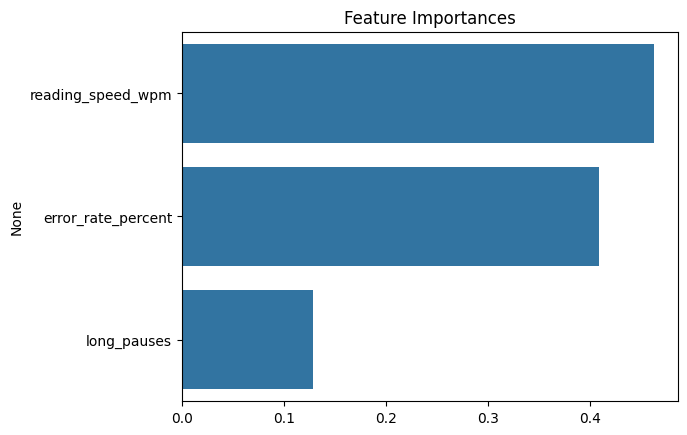

In [16]:
feat_imp = pd.Series(reg.feature_importances_, index=X.columns)
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Feature Importances")
plt.show()